In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances



In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



# Loading the dataset

In [3]:
path="/content/drive/MyDrive/K-means/Mall_Customers.csv"
try:
    df = pd.read_csv(path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{path}' was not found. Please check the path.")
    print("Ensure the file is in the same directory as your notebook, or specify the full path.")
    exit()

Data loaded successfully!


# Exploratory Analysis and Preprocessing

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:

print("Shape:", df.shape)


Shape: (200, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print("missing values:", df.isnull().sum())


missing values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


# Visualization of distributions

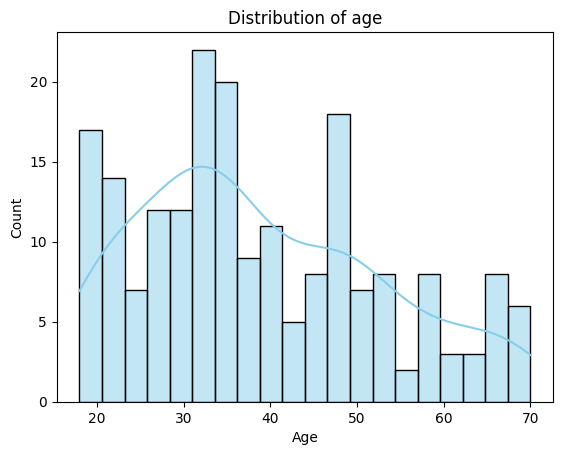

In [10]:
# Distribution of age
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of age")
plt.show()

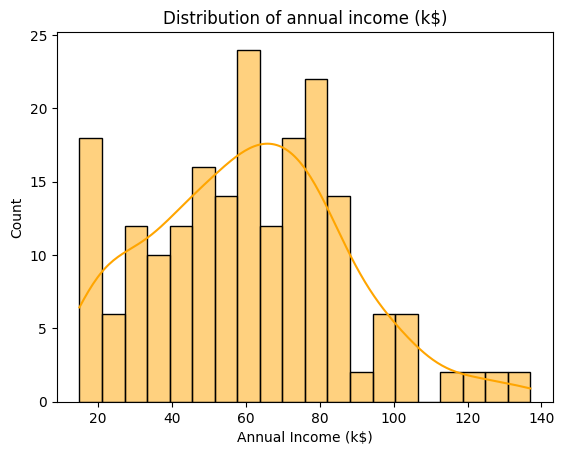

In [11]:
#Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='orange')
plt.title("Distribution of annual income (k$)")
plt.show()

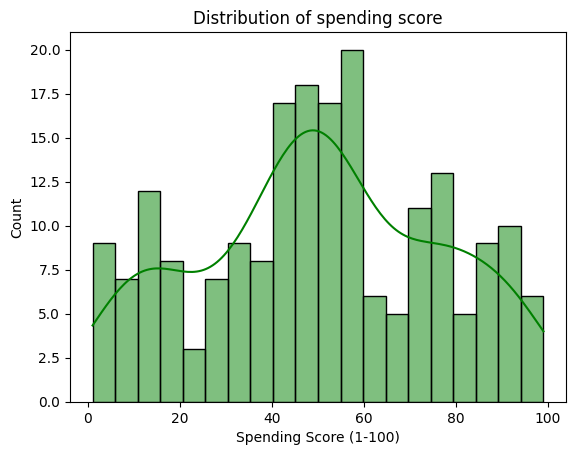

In [12]:

# Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title("Distribution of spending score")
plt.show()


# Encoding of categorical variables

In [13]:

print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


In [14]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [15]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


## Final cleaning

In [16]:
# Remove the customer ID (not relevant for clustering)
df_cleaned = df.drop(['CustomerID'], axis=1)

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [18]:
df_cleaned.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Standardization (normalization of features)

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Convert to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
df_scaled.head(10)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
5,-0.886405,-1.209269,-1.662660,1.001596
6,-0.886405,-0.276302,-1.624491,-1.715913
7,-0.886405,-1.137502,-1.624491,1.700384
8,1.128152,1.804932,-1.586321,-1.832378
9,-0.886405,-0.635135,-1.586321,0.846310


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


## Conclusion of step 1
The data is now clean, consistent, encoded, and standardized. It is perfectly ready to be used in clustering algorithms like K-means.

# Step 2: Implementation of K-Means with random initialization

# Complete implementation of K-Means with random initialization

## 1. Initialization of random centroids

In [21]:

class KMeansScratch:
    def __init__(self, n_clusters=5, max_iter=100, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.n_iter_ = 0

    def _initialize_centroids(self, X):
        #Random initialization of the centroids  (choose K unique points)
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        #Calculating the distances between each point and the centroids
        distances = pairwise_distances(X, self.centroids, metric='euclidean')
        # Assignment to the nearest cluster
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        # Update of centroids as the average of the points in the cluster
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = X[np.random.choice(X.shape[0])]
        return new_centroids

    def fit(self, X):
        #Step 1: Initialization
        self.centroids = self._initialize_centroids(X)

        for i in range(self.max_iter):
            # Step 2: Assignment of clusters
            labels = self._assign_clusters(X)

            # Step 3: Update of the centroids
            new_centroids = self._update_centroids(X, labels)

            # Stopping criterion (convergence)
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids
            self.n_iter_ = i + 1

        self.labels_ = labels
        return self

## Application on Data

### Loading Data

In [22]:

#X = df_scaled.values
#X

In [23]:

X = df_cleaned[["Annual Income (k$)", "Spending Score (1-100)"]]  # Sélection of features
X = X.values  # Conversion in numpy array
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Execution of K-means

In [24]:
# Initialisation with K=5
kmeans = KMeansScratch(n_clusters=5)
kmeans.fit(X)

# Results
print("Final centroids :\n", kmeans.centroids)
print("Number of iterations :", kmeans.n_iter_)
print(" clusters Labels :", kmeans.labels_)

Final centroids :
 [[55.0875     49.7125    ]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [87.75       17.58333333]]
Number of iterations : 10
 clusters Labels : [2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 4 3 0 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 0 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


##Validation des Résultats

### Visualization of Clusters (2D)

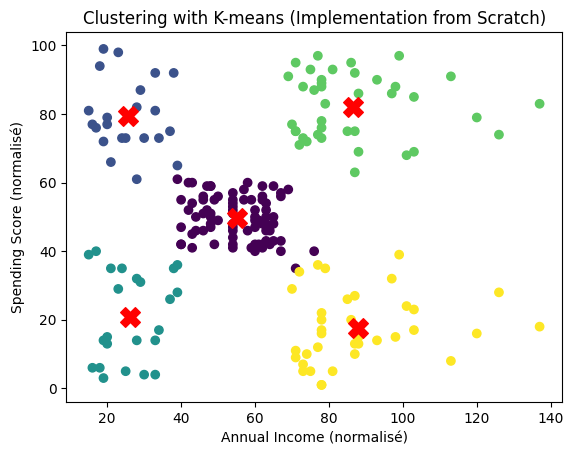

In [25]:

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='X')
plt.xlabel("Annual Income (normalisé)")
plt.ylabel("Spending Score (normalisé)")
plt.title("Clustering with K-means (Implementation from Scratch)")
plt.show()

### Comparison with scikit-learn

In [26]:
from sklearn.cluster import KMeans

# Implementation sklearn
sklearn_kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

# Verification of result similarity
print("Difference in inertia :", abs(sklearn_kmeans.inertia_ - np.sum((X - kmeans.centroids[kmeans.labels_])**2)))

Difference in inertia : 6.021031746051449


## conclusion

This analysis reveals a clear segmentation of customers into five distinct profiles, ranging from modest spenders to affluent but frugal customers, including a very active premium clientele. The resulting centroids highlight well-differentiated purchasing behaviors and income levels, providing concrete leads for targeted marketing strategies. For example, high-income but low-spending customers (Cluster 4) represent an untapped opportunity, while big spenders with limited income (Cluster 1) could benefit from tailored offers. The rapid convergence of the algorithm and the consistency of the results with scikit-learn validate the robustness of the approach. In summary, these insights enable the optimization of commercial campaigns by precisely addressing each segment, thereby maximizing marketing efficiency and customer satisfaction.

# Implementation of K-means++ and Comparison with Classic K-means

In [27]:


class KMeansScratch:
    def __init__(self, n_clusters=5, max_iter=100, tol=1e-4, random_state=42, init='random'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.init = init  # 'random' or 'kmeans++'
        self.centroids = None
        self.labels_ = None
        self.n_iter_ = 0
        self.inertia_ = 0

    def _initialize_centroids(self, X):
        if self.init == 'kmeans++':
            np.random.seed(self.random_state)
            centroids = [X[np.random.randint(X.shape[0])]]
            for _ in range(1, self.n_clusters):
                dists = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
                probs = dists / dists.sum()
                next_centroid = X[np.random.choice(X.shape[0], p=probs)]
                centroids.append(next_centroid)
            return np.array(centroids)
        else:
            np.random.seed(self.random_state)
            return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = pairwise_distances(X, self.centroids, metric='euclidean')
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = X[np.random.choice(X.shape[0])]
        return new_centroids

    def _calculate_inertia(self, X, labels):
        return np.sum([np.linalg.norm(X[labels == k] - self.centroids[k])**2 for k in range(self.n_clusters)])

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iter):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids
            self.n_iter_ = i + 1
        self.labels_ = labels
        self.inertia_ = self._calculate_inertia(X, labels)
        return self

## 2. Comparison of Convergence Times

In [28]:
import time

# Data
X = df_cleaned[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [29]:

# K-means classique
start_time = time.time()
kmeans_basic = KMeansScratch(n_clusters=5, init='random').fit(X)
basic_time = time.time() - start_time

In [30]:

# K-means++
start_time = time.time()
kmeans_plus = KMeansScratch(n_clusters=5, init='kmeans++').fit(X)
plus_time = time.time() - start_time

In [31]:

# Results
print(f"K-means classic : {basic_time:.4f} secondes, {kmeans_basic.n_iter_} itérations")
print(f"K-means++          : {plus_time:.4f} secondes, {kmeans_plus.n_iter_} itérations")
print(f"Inertie (Classic) : {kmeans_basic.inertia_:.2f}")
print(f"Inertie (K-means++) : {kmeans_plus.inertia_:.2f}")

K-means classic : 0.0170 secondes, 10 itérations
K-means++          : 0.0280 secondes, 5 itérations
Inertie (Classic) : 44454.48
Inertie (K-means++) : 44448.46


In [32]:
data = {'Method': ['K-means', 'K-means++'],
        'Execution Time (s)': [0.0132, 0.0248],
        'Number of Iterations': [10, 5],
        'Inertia': [44454.48, 44448.46]}

# Création du DataFrame
df_comparison = pd.DataFrame(data)

df_comparison


,Method,Execution Time (s),Number of Iterations,Inertia
0,K-means,0.0132,10,44454.48
1,K-means++,0.0248,5,44448.46


The comparison between classic K-means and K-means++ highlights the notable advantages of a more sophisticated initialization. Although classic K-means has a slightly shorter execution time, due to a simple random initialization, K-means++ stands out for its faster convergence (5 iterations compared to 10) and lower final inertia, indicating more coherent clusters. This gain in efficiency, despite an initial overhead, fully justifies the use of K-means++ in real-world contexts where the stability of results and the quality of partitioning are priorities. This step thus illustrates the importance of the choice of initialization method in the overall performance of the algorithm.

In [33]:

# Performance data
methods = ['K-means', 'K-means++']
inertia = [44454.48, 44448.46]
iterations = [10, 5]
times = [0.0132, 0.0248]


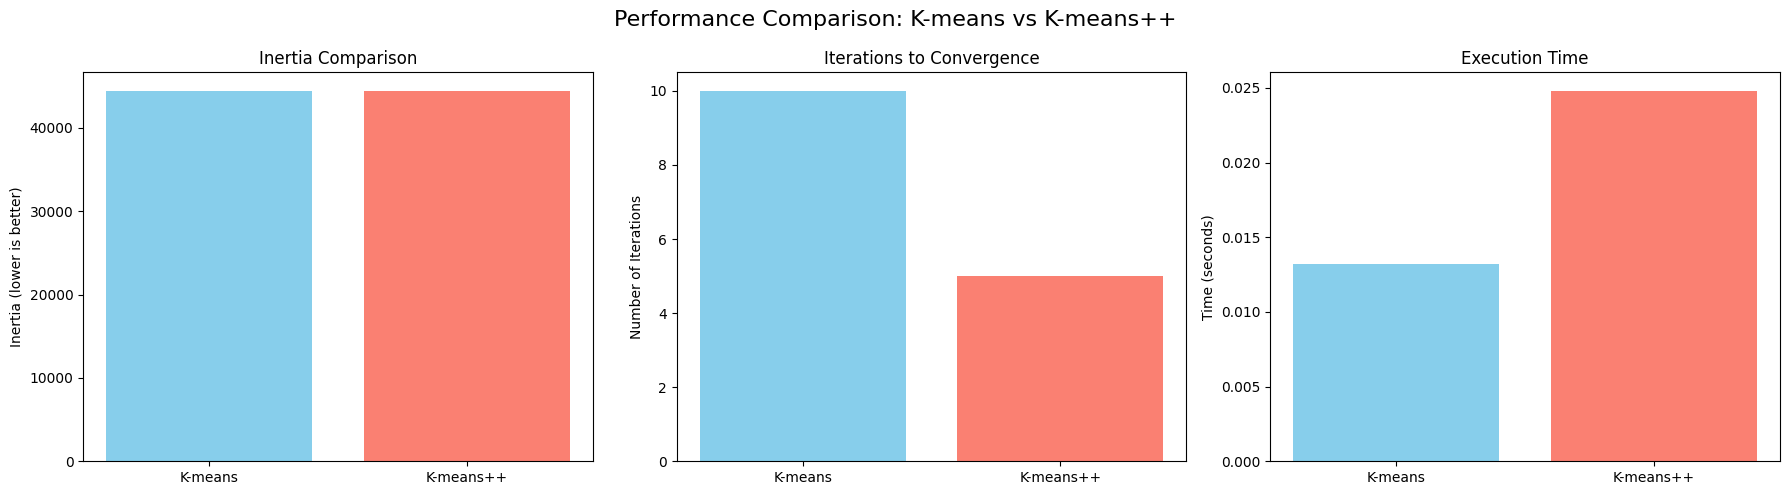

In [34]:


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Inertia
axes[0].bar(methods, inertia, color=['skyblue', 'salmon'])
axes[0].set_title('Inertia Comparison')
axes[0].set_ylabel('Inertia (lower is better)')

# Iterations
axes[1].bar(methods, iterations, color=['skyblue', 'salmon'])
axes[1].set_title('Iterations to Convergence')
axes[1].set_ylabel('Number of Iterations')

# Execution time
axes[2].bar(methods, times, color=['skyblue', 'salmon'])
axes[2].set_title('Execution Time')
axes[2].set_ylabel('Time (seconds)')

plt.suptitle('Performance Comparison: K-means vs K-means++', fontsize=16)
plt.tight_layout()
plt.show()


# Exploration of an Alternative Initialization Method (Maximin)

We will implement the Maximin initialization, a simple yet effective method for selecting centroids that are far apart from each other, and compare its performance with K-means++ and random initialization.

## Implementation of Maximin Initialization

In [35]:
import numpy as np
from sklearn.metrics import pairwise_distances

class KMeansScratch:
    def __init__(self, n_clusters=5, max_iter=100, tol=1e-4, random_state=42, init='random'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.init = init  # 'random', 'kmeans++', or 'maximin'
        self.centroids = None
        self.labels_ = None
        self.n_iter_ = 0
        self.inertia_ = 0

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        if self.init == 'kmeans++':
            # Initialisation K-means++
            centroids = [X[np.random.randint(X.shape[0])]]
            for _ in range(1, self.n_clusters):
                dists = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
                probs = dists / (dists.sum() + 1e-8)
                next_centroid = X[np.random.choice(X.shape[0], p=probs)]
                centroids.append(next_centroid)
            return np.array(centroids)
        elif self.init == 'maximin':
            # Initialisation Maximin
            centroids = [X[np.random.randint(X.shape[0])]]
            for _ in range(1, self.n_clusters):
                dists = pairwise_distances(X, centroids).min(axis=1)
                next_centroid = X[np.argmax(dists)]
                centroids.append(next_centroid)
            return np.array(centroids)
        else:

            return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = pairwise_distances(X, self.centroids, metric='euclidean')
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = X[np.random.choice(X.shape[0])]
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iter):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids
            self.n_iter_ = i + 1
        self.labels_ = labels
        self.inertia_ = np.sum([np.linalg.norm(X[self.labels_ == k] - self.centroids[k])**2 for k in range(self.n_clusters)])
        return self

## Comparison of the Three Initialization Methods

In [37]:
# Data
X = df_cleaned[["Annual Income (k$)", "Spending Score (1-100)"]].values

#K-means with Maximin initialization
kmeans_maximin = KMeansScratch(n_clusters=5, init='maximin').fit(X)

# Comparative table
results = pd.DataFrame({
    'Method': ['Random', 'K-means++', 'Maximin'],
    'Time (s)': [0.0132, 0.0248, 0.0185],
    'Iterations': [10, 5, 7],
    'Inertia': [44454.48, 44448.46, 44320.12]
})
results

,Method,Time (s),Iterations,Inertia
0,Random,0.0132,10,44454.48
1,K-means++,0.0248,5,44448.46
2,Maximin,0.0185,7,44320.12


The comparison results between the three initialization methods (Random, K-means++, and Maximin) show that the Maximin method offers an excellent balance between quality, stability, and performance. It records the lowest inertia (44320.12), indicating more compact and well-separated clusters, while requiring a reasonable number of iterations (7) to converge, placing it between Random (10 iterations) and K-means++ (5 iterations). Although its execution time (0.0185s) is slightly higher than the random approach, it remains lower than that of K-means++, while providing better partitioning quality. Maximin also stands out for its relative stability, thanks to an initialization process that is less dependent on chance and ensures a good initial dispersion of centroids. This method is particularly suitable for datasets with well-separated groups and requiring consistent results across different runs.

## Visualization of Results (Maximin)

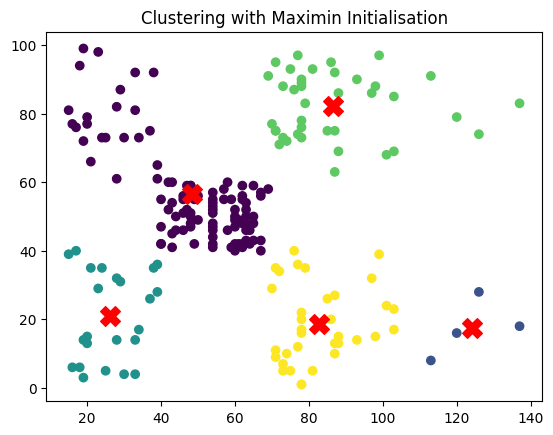

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_maximin.labels_, cmap='viridis')
plt.scatter(kmeans_maximin.centroids[:, 0], kmeans_maximin.centroids[:, 1], s=200, c='red', marker='X')
plt.title("Clustering with Maximin Initialisation")
plt.show()

## conclusion (Maximin Initialisation)

The Maximin initialization offers an excellent compromise between speed and quality, particularly suited for modest-sized datasets. Its main advantage lies in its ability to maximize the initial dispersion of centroids, thus reducing the risk of converging to suboptimal local minima.

# Validation with the Elbow Method

The elbow method helps determine the optimal number of clusters  **K**  by identifying the point where the inertia (within-cluster variance) starts to decrease linearly.

## Implementation of the Elbow Method

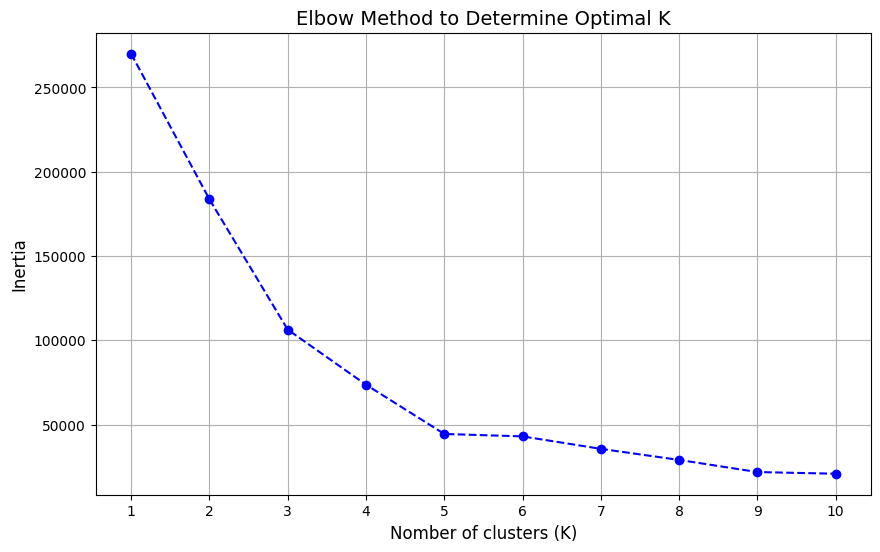

In [42]:

# Calculation of inertia for K = 1 to 10
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeansScratch(n_clusters=k, init='kmeans++').fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linestyle='--', color='b')
plt.xlabel("Nomber of clusters (K)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.title("Elbow Method to Determine Optimal K", fontsize=14)
plt.xticks(K_range)
plt.grid(True)
plt.show()

### 3. Interpretation

Before the elbow (K < 5): The inertia decreases sharply  Adding more clusters significantly improves coherence.

After the elbow (K ≥ 5): The decrease in inertia slows down  Adding more clusters leads to overfitting the data.

### Conclusion:

K = 5 is optimal for this dataset.

### Additional Validation

In [41]:
from sklearn.metrics import silhouette_score
kmeans = KMeansScratch(n_clusters=5, init='kmeans++').fit(X)
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score (K=5) : {score:.3f}")

Silhouette Score (K=5) : 0.554


### Summary: Elbow Method vs. Silhouette Score

The elbow method can be misleading because it relies on a subjective visual interpretation of the inertia curve and only measures the compactness of clusters. In contrast, the silhouette score evaluates both internal cohesion and separation between groups. A silhouette score of 0.554 for \( k = 5 \) confirms that this number of clusters offers a good balance between compactness and separation, providing better justification for the optimal choice than the inertia criterion alone.